# Project 1: e-Commerce (Target) Sales Dataset Analysis
## Main Question: What are the top 3 states with the most orders, and what was their purchasing behavior?
In this notebook, I will be analyzing the Target Sales Dataset (5 csv files) to find the top 3 states in Brazil with the most orders and their purchasing behaviors.

## Importing Necessary Libraries
SQLite to perform SQL queries. Pandas for data manipulation and analysis, and Matplotlib and Seaborn for visualizations. The %matplotlib inline command ensures that plots are displayed directly in the notebook output.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing the Dataset's csv files
Loading the dataset's five csv files into Pandas Dataframes.

In [2]:
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')
payments = pd.read_csv('payments.csv')
products = pd.read_csv('products.csv')
order_items = pd.read_csv('order_items.csv')

## Preparing for SQL Queries

Creating a database and connecting to it.

In [3]:
conn = sqlite3.connect('project1.db')
cursor = conn.cursor()

Reading the Pandas Dataframes into SQL tables using the 'to_sql()' method.

In [4]:
customers.to_sql('customers', conn, if_exists='replace', index=False)
orders.to_sql('orders', conn, if_exists='replace', index=False)
payments.to_sql('payments', conn, if_exists='replace', index=False)
products.to_sql('products', conn, if_exists='replace', index=False)
order_items.to_sql('order_items', conn, if_exists='replace', index=False)

112650

Previewing the tables.

In [5]:
tables = ['customers', 'orders', 'payments', 'products', 'order_items']

for table in tables:
    query = f"SELECT * FROM {table} LIMIT 5;"
    preview = pd.read_sql(query, conn)
    print(f"Preview of {table} table:")
    print(preview, "\n")

Preview of customers table:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP   

Preview of orders table:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49

## Joining the Dataset with SQL
Using SQL to join the datasets while retaining only the relevant columns.

There are five SQL tables I have created from the five csv files. Below are the table names the the columns I would like from each of them.

1. customers
- customer_id
- customer_state

2. orders
- order_id
- order_purchase_timestamp

3. payments
- order_id
- payment_type
- payment_installments
- payment_value

4. products
- product_id
- product_category_name

5. order_items
- order_id
- price

### Join 1: Tables 'orders' and 'customers'
Joining tables 'orders' and 'customers' on column 'customer_id' to get columns 'customer_state' and 'order_purchase_timestamp'.

In [8]:
query = "DROP TABLE IF EXISTS orders_customers_join"
cursor.execute(query)

query = """
CREATE TABLE orders_customers_join AS
SELECT o.order_id, o.order_purchase_timestamp, o.customer_id, c.customer_state
FROM orders AS o
INNER JOIN customers AS c
ON o.customer_id = c.customer_id
"""

cursor.execute(query)
conn.commit()

In [9]:
query = "SELECT * FROM orders_customers_join LIMIT 5;"
orders_customers_join_preview = pd.read_sql_query(query, conn)
orders_customers_join_preview.head()

,order_id,order_purchase_timestamp,customer_id,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,BA
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,f88197465ea7920adcdbec7375364d82,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,8ab97904e6daea8866dbdbc4fb7aad2c,SP


The join was successfully completed and stored in table orders_customers_join.

### Join 2: Tables 'orders_customers_join' and 'payments'
Joining tables 'orders_customers_join' and 'payments' on column 'order_id' to get 'columns 'payment_type', 'payment_installments' and 'payment_value'

In [10]:
query = "DROP TABLE IF EXISTS orders_customers_payments_join"
cursor.execute(query)

query = """
CREATE TABLE orders_customers_payments_join AS
SELECT ocj.order_id, ocj.order_purchase_timestamp, ocj.customer_id, ocj.customer_state,
p.payment_type, p.payment_installments, p.payment_value
FROM orders_customers_join AS ocj
INNER JOIN payments AS p
ON ocj.order_id = p.order_id
"""

cursor.execute(query)
conn.commit()

In [11]:
query = "SELECT * FROM orders_customers_payments_join LIMIT 5"
orders_customers_payments_join_preview = pd.read_sql_query(query, conn)
orders_customers_payments_join_preview.head()

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,BA,UPI,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,GO,credit_card,3,179.12


The join was successfully completed and stored in table orders_customers_payments_join.

### Join 3: Tables 'orders_customers_payments_join' and 'order_items'
Joining tables 'orders_customers_payments_join' and 'order_items' on column 'order_id' to get column 'price'.

In [14]:
query = "DROP TABLE IF EXISTS orders_customers_payments_order_items_join"
cursor.execute(query)

query = """
CREATE TABLE orders_customers_payments_order_items_join AS
SELECT ocpj.order_id, ocpj.order_purchase_timestamp, ocpj.customer_id, ocpj.customer_state,
ocpj.payment_type, ocpj.payment_installments, ocpj.payment_value,
oi.price, oi.product_id
FROM orders_customers_payments_join AS ocpj
INNER JOIN order_items AS oi
ON ocpj.order_id = oi.order_id
"""

cursor.execute(query)
conn.commit()

In [15]:
query = "SELECT * FROM orders_customers_payments_order_items_join LIMIT 5"
orders_customers_payments_order_items_join_preview = pd.read_sql_query(query, conn)
orders_customers_payments_order_items_join_preview.head()

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value,price,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,credit_card,1,18.12,29.99,87285b34884572647811a353c7ac498a
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,2.00,29.99,87285b34884572647811a353c7ac498a
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,18.59,29.99,87285b34884572647811a353c7ac498a
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,BA,UPI,1,141.46,118.70,595fac2a385ac33a80bd5114aec74eb8
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,GO,credit_card,3,179.12,159.90,aa4383b373c6aca5d8797843e5594415


The join was successfully completed and stored in table orders_customers_payments_order_items_join.

### Join 4: Tables 'orders_customers_payments_order_items_join' and 'products'
Joining tables 'orders_customers_payments_order_items_join' and 'products' on column 'product_id' to get column 'product_category_name'.

In [16]:
query = "DROP TABLE IF EXISTS orders_customers_payments_order_items_products_join"
cursor.execute(query)

query = """
CREATE TABLE orders_customers_payments_order_items_products_join AS
SELECT previous.order_id, previous.order_purchase_timestamp, previous.customer_id, previous.customer_state,
previous.payment_type, previous.payment_installments, previous.payment_value, previous.price, previous.product_id,
p."product category"
FROM orders_customers_payments_order_items_join AS previous
INNER JOIN products AS p
ON previous.product_id = p.product_id
"""

cursor.execute(query)
conn.commit()

In [17]:
query = "SELECT * FROM orders_customers_payments_order_items_products_join LIMIT 5"
orders_customers_payments_order_items_products_join_preview = pd.read_sql_query(query, conn)
orders_customers_payments_order_items_products_join_preview.head()

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value,price,product_id,product category
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,credit_card,1,18.12,29.99,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,2.00,29.99,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,18.59,29.99,87285b34884572647811a353c7ac498a,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,BA,UPI,1,141.46,118.70,595fac2a385ac33a80bd5114aec74eb8,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,GO,credit_card,3,179.12,159.90,aa4383b373c6aca5d8797843e5594415,automotive


The join was successfully completed and stored in table orders_customers_payments_order_items_products_join.

### Exporting the Final SQL Table

Turning the final SQL table into a dataframe.

In [18]:
query = "SELECT * FROM orders_customers_payments_order_items_products_join"
target_sales = pd.read_sql_query(query, conn)
target_sales.head()

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value,price,product_id,product category
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,credit_card,1,18.12,29.99,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,2.00,29.99,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,18.59,29.99,87285b34884572647811a353c7ac498a,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,BA,UPI,1,141.46,118.70,595fac2a385ac33a80bd5114aec74eb8,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,GO,credit_card,3,179.12,159.90,aa4383b373c6aca5d8797843e5594415,automotive


Exporting the final SQL table into a csv file.

In [19]:
target_sales.to_csv("target_sales_full.csv", index=False)

## Data Cleaning

In [20]:
display(target_sales.head())
target_sales.shape

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value,price,product_id,product category
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,credit_card,1,18.12,29.99,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,2.00,29.99,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,18.59,29.99,87285b34884572647811a353c7ac498a,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,BA,UPI,1,141.46,118.70,595fac2a385ac33a80bd5114aec74eb8,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,GO,credit_card,3,179.12,159.90,aa4383b373c6aca5d8797843e5594415,automotive


(117601, 10)

### Initial Thoughts
- There are 117,601 rows and 10 columns.
- No major issues are detected.
- The 'product category' column might benefit from capitalization.

### Addressing 0 Values

I will first identify the 0 values in all columns.

In [21]:
(target_sales == 0).sum()

order_id                    0
order_purchase_timestamp    0
customer_id                 0
customer_state              0
payment_type                0
payment_installments        3
payment_value               6
price                       0
product_id                  0
product category            0
dtype: int64

There are three 0 values in the 'payment_installments' column. There are six 0 values in the 'payment_value' column. I will first examine the rows with 0 values in the 'payment_installments' column.

In [22]:
target_sales[(target_sales['payment_installments'] == 0)]

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value,price,product_id,product category
75258,744bade1fcf9ff3f31d860ace076d422,2018-04-22 11:34:42,5e5794daaa13f73e2f1cdb4114529843,SP,credit_card,0,58.69,45.90,0cf573090c66bb30ac5e53c82bdb0403,telephony
78364,1a57108394169c0b47d8f876acc9ba2d,2018-05-15 16:25:14,48ebb06cf56dba9d009230cc751bb195,BA,credit_card,0,129.94,41.69,db35a562fb6ba63e19fa42a15349dc04,housewares
78365,1a57108394169c0b47d8f876acc9ba2d,2018-05-15 16:25:14,48ebb06cf56dba9d009230cc751bb195,BA,credit_card,0,129.94,41.69,db35a562fb6ba63e19fa42a15349dc04,housewares


The first row with an index of 75258 does not seem to have any other errors in the other columns.

The two other rows with an index of 78364 and 78365 seem to be duplicate rows. Nothing unusual is detected in the other columns.

A payment installment of 0 should not be possible in the real world. Therefore, I will remove these three rows.

In [23]:
target_sales = target_sales[target_sales['payment_installments'] != 0]

In [24]:
(target_sales['payment_installments'] == 0).sum()

np.int64(0)

The rows with 0 values in the payment_installments column were successfully removed.

I will now look at the rows with 0 values in the payment_value column.

In [25]:
target_sales[(target_sales['payment_value'] == 0)]

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value,price,product_id,product category
500,45ed6e85398a87c253db47c2d9f48216,2017-06-08 21:18:45,8eab8f9b3c744b76b65f7a2c0c8f2d6c,GO,voucher,1,0.0,56.99,75d6b6963340c6063f7f4cfcccfe6a30,perfumery
30652,fa65dad1b0e818e3ccc5cb0e39231352,2017-04-20 12:45:34,9af2372a1e49340278e7c1ef8d749f34,MT,voucher,1,0.0,392.55,1aecdb5fa3add74e385f25c6c527a462,Garden tools
30653,fa65dad1b0e818e3ccc5cb0e39231352,2017-04-20 12:45:34,9af2372a1e49340278e7c1ef8d749f34,MT,voucher,1,0.0,392.55,1aecdb5fa3add74e385f25c6c527a462,Garden tools
38267,6ccb433e00daae1283ccc956189c82ae,2017-10-26 23:51:35,843b211abe7b0264dd4a69eafc5bdf43,RJ,voucher,1,0.0,94.00,2ee4be9805f228255a38a6f9b03fff1a,sport leisure
101307,b23878b3e8eb4d25a158f57d96331b18,2017-05-27 19:20:24,648121b599d98c420ef93f6135f8c80c,ES,voucher,1,0.0,135.30,e306ca54c91b21392317d5b4632c9fe3,Games consoles
114647,8bcbe01d44d147f901cd3192671144db,2018-01-24 23:24:14,f2def7f64f36952f2f5a9791f0285f34,RJ,voucher,1,0.0,59.00,85d4c1a46f08f730de651ea6f6645313,stationary store


The rows with index 30652 and 30653 seem to be duplicate rows.

No unusual issues were found within the other column values.

All of the rows have a payment type of 'voucher' which might signify the use of a discount. This may explain why the payment_value is 0.

Since vouchers are used in the real world and it is possible to have a payment value of 0 in the real world, I will leave these rows in the dataset. The duplicate rows will be addressed further in this notebook.

### Checking for Missing Values

In [26]:
target_sales.isnull().sum()

order_id                       0
order_purchase_timestamp       0
customer_id                    0
customer_state                 0
payment_type                   0
payment_installments           0
payment_value                  0
price                          0
product_id                     0
product category            1698
dtype: int64

The only column with missing values is 'product category'. I will examine a few rows.

In [27]:
target_sales[target_sales['product category'].isnull()].head()

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value,price,product_id,product category
8,136cce7faa42fdb2cefd53fdc79a6098,2017-04-11 12:22:08,ed0271e0b7da060a393796590e7b737a,RS,credit_card,1,65.95,49.90,a1804276d9941ac0733cfd409f5206eb,None
129,bfe42c22ecbf90bc9f35cf591270b6a7,2018-01-27 22:04:34,803ac05904124294f8767894d6da532b,MG,credit_card,1,42.40,27.30,71225f49be70df4297892f6a5fa62171,None
221,58ac1947c1a9067b9f416cba6d844a3f,2017-09-13 09:18:50,ee8e1d37f563ecc11cc4dcb4dfd794c2,SP,credit_card,5,124.16,110.00,9820e04e332fc450d6fd975befc1bc28,None
274,e22b71f6e4a481445ec4527cb4c405f7,2017-04-22 13:48:18,1faf89c8f142db3fca6cf314c51a37b6,MG,credit_card,3,34.24,22.50,3bc5164bc7f4be77002d6651da65c98c,None
316,a094215e786240fcfefb83d18036a1cd,2018-02-08 18:56:45,86acfb656743da0c113d176832c9d535,SP,credit_card,1,132.05,122.99,5a848e4ab52fd5445cdc07aab1c40e48,None


Since there are 1,698 rows with missing 'product category' values, I will fill these rows with 'Unknown' to keep as much data as possible.

In [28]:
target_sales['product category'] = target_sales['product category'].fillna('Unknown')

In [29]:
target_sales.isnull().sum()

order_id                    0
order_purchase_timestamp    0
customer_id                 0
customer_state              0
payment_type                0
payment_installments        0
payment_value               0
price                       0
product_id                  0
product category            0
dtype: int64

The missing values were successfully filled.

### Addressing Duplicate Rows
Next, I will check for duplicate rows that may have to be removed.

In [31]:
target_sales.duplicated().sum()

np.int64(11213)

There are 11,213 duplicate rows. I will examine these rows and remove them.

In [32]:
target_sales[target_sales.duplicated()]

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value,price,product_id,product category
14,e6ce16cb79ec1d90b1da9085a6118aeb,2017-05-16 19:41:10,494dded5b201313c64ed7f100595b95c,RJ,credit_card,1,259.06,99.00,08574b074924071f4e201e151b152b4e,Garden tools
60,9faeb9b2746b9d7526aef5acb08e2aa0,2018-07-26 14:39:59,79183cd650e2bb0d475b0067d45946ac,RS,credit_card,2,151.04,60.00,f48eb5c2fde13ca63664f0bb05f55346,sport leisure
66,66e4624ae69e7dc89bd50222b59f581f,2018-03-09 14:50:15,684fa6da5134b9e4dab731e00011712d,SE,credit_card,9,91.68,22.99,b37b72d5a56f887725c2862184b8cab8,telephony
76,f271576bed568e896f99eb710cd3a6f8,2018-01-07 21:44:54,5dda11942d4f77bee3a46d71e442aec4,BA,credit_card,4,824.76,329.90,d457916b4fdc60154ed93b5dd3e6fd69,Construction Tools Construction
79,68e48e68da1f50f7c5838ea75e3a20dd,2018-06-18 16:02:23,4afc1dcca5fe8926fc97d60a4497f8ab,SP,credit_card,3,392.60,84.90,a659cb33082b851fb87a33af8f0fff29,automotive
...,...,...,...,...,...,...,...,...,...,...
117521,dbd4cbb492a12b99c5224014930acc18,2017-03-26 14:12:46,a14f464b2a19d761f7f3f0885d5ea955,SP,debit_card,1,140.90,37.40,d34efb58e1930773fcde9b951892b1b1,housewares
117543,83db27f85506380229913b0dfdf5cd18,2018-04-18 12:35:58,472acc24324ad4cee482fe4ef5910dc1,RJ,UPI,1,398.18,149.94,86f2416d4670e4ea3ca5494d043d9f24,Furniture office
117551,b3112ca67f3afd4e20cf2ee91fc4f804,2018-08-02 22:46:54,6f83c71b6c044fb156d697d4130fe9b5,SP,credit_card,9,239.50,95.00,4f18ca9862f511ecba98258b2194d061,Furniture
117570,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:07,609b9fb8cad4fe0c7b376f77c8ab76ad,SP,credit_card,10,748.24,356.00,0df37da38a30a713453b03053d60d3f7,sport leisure


In [33]:
target_sales = target_sales.drop_duplicates()

In [34]:
target_sales.duplicated().sum()

np.int64(0)

The duplicates were successfully dropped.

### Checking Data Types
Examining the data types to ensure they are appropriate to prevent errors with calculations and data processing in the future.

In [35]:
target_sales.dtypes

order_id                     object
order_purchase_timestamp     object
customer_id                  object
customer_state               object
payment_type                 object
payment_installments          int64
payment_value               float64
price                       float64
product_id                   object
product category             object
dtype: object

The only data type that might benefit from change is the 'order_purchase_timestamp'. I will change this column to type 'datetime'.

In [36]:
target_sales['order_purchase_timestamp'] = pd.to_datetime(target_sales['order_purchase_timestamp'])

### Standardizing Decimal Points and Capitalization

In [37]:
target_sales.head()

,order_id,order_purchase_timestamp,customer_id,customer_state,payment_type,payment_installments,payment_value,price,product_id,product category
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,credit_card,1,18.12,29.99,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,2.00,29.99,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,9ef432eb6251297304e76186b10a928d,SP,voucher,1,18.59,29.99,87285b34884572647811a353c7ac498a,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,b0830fb4747a6c6d20dea0b8c802d7ef,BA,UPI,1,141.46,118.70,595fac2a385ac33a80bd5114aec74eb8,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,41ce2a54c0b03bf3443c3d931a367089,GO,credit_card,3,179.12,159.90,aa4383b373c6aca5d8797843e5594415,automotive


From viewing the first few rows, ensuring that all values in the 'payment_value' and 'price' columns have 2 decimal points might be beneficial.

I will also examine the unique values in the following columns to ensure there are no typos, capitalization errors, or unnecessary white spaces: 'customer_state', 'payment_type', 'product category'.

Rounding the 'payment_value' and 'price' column to 2 decimal points.

In [38]:
target_sales['payment_value'] = target_sales['payment_value'].round(2)
target_sales['price'] = target_sales['price'].round(2)

Checking the unique values in 'customer_state'.

In [39]:
target_sales['customer_state'].unique()

array(['SP', 'BA', 'GO', 'RN', 'PR', 'RS', 'RJ', 'MG', 'SC', 'RR', 'PE',
       'TO', 'CE', 'DF', 'SE', 'MT', 'PB', 'PA', 'RO', 'ES', 'AP', 'MS',
       'MA', 'PI', 'AL', 'AC', 'AM'], dtype=object)

No typos, capitalization errors, or white spaces are detected.

Checking the unique values in 'payment_type'.

In [40]:
target_sales['payment_type'].unique()

array(['credit_card', 'voucher', 'UPI', 'debit_card'], dtype=object)

No typos, capitalization erorrs, or white spaces are detected.

Checking the unique values in 'product category'.

In [43]:
sorted(target_sales['product category'].unique())

['Agro Industria e Comercio',
 'Art',
 'Arts and Crafts',
 'Bags Accessories',
 'Blu Ray DVDs',
 'CITTE AND UPHACK FURNITURE',
 'CONSTRUCTION SECURITY TOOLS',
 'Casa Construcao',
 'Christmas articles',
 'Construction Tools Construction',
 'Construction Tools Garden',
 'Construction Tools Illumination',
 'Construction Tools Tools',
 'Cool Stuff',
 'Drink foods',
 'ELECTRICES 2',
 'Fashion Bags and Accessories',
 'Fashion Calcados',
 "Fashion Children's Clothing",
 "Fashion Men's Clothing",
 'Fashion Sport',
 'Fashion Underwear and Beach Fashion',
 "Fashion Women's Clothing",
 'Furniture',
 'Furniture Decoration',
 'Furniture Kitchen Service Area Dinner and Garden',
 'Furniture office',
 'Games consoles',
 'Garden tools',
 'General Interest Books',
 'HEALTH BEAUTY',
 'HOUSE PASTALS OVEN AND CAFE',
 'House Comfort 2',
 'House comfort',
 'Hygiene diapers',
 'IMAGE IMPORT TABLETS',
 'Imported books',
 'Industry Commerce and Business',
 'Kitchen portable and food coach',
 'La Cuisine',
 'Mar

There are many issues with capitalization. I will change all values to title case.

In [44]:
target_sales['product category'] = target_sales['product category'].str.title()
sorted(target_sales['product category'].unique())

['Agro Industria E Comercio',
 'Art',
 'Arts And Crafts',
 'Audio',
 'Automotive',
 'Babies',
 'Bags Accessories',
 'Bed Table Bath',
 'Blu Ray Dvds',
 'Casa Construcao',
 'Cds Music Dvds',
 'Christmas Articles',
 'Cine Photo',
 'Citte And Uphack Furniture',
 'Climatization',
 'Computer Accessories',
 'Construction Security Tools',
 'Construction Tools Construction',
 'Construction Tools Garden',
 'Construction Tools Illumination',
 'Construction Tools Tools',
 'Cool Stuff',
 'Drink Foods',
 'Drinks',
 'Electrices 2',
 'Electronics',
 'Electrostile',
 'Fashion Bags And Accessories',
 'Fashion Calcados',
 "Fashion Children'S Clothing",
 "Fashion Men'S Clothing",
 'Fashion Sport',
 'Fashion Underwear And Beach Fashion',
 "Fashion Women'S Clothing",
 'Fixed Telephony',
 'Flowers',
 'Foods',
 'Furniture',
 'Furniture Decoration',
 'Furniture Kitchen Service Area Dinner And Garden',
 'Furniture Office',
 'Games Consoles',
 'Garden Tools',
 'General Interest Books',
 'Health Beauty',
 'Home 

Most of the capitalization errors were resolved, but some values still have incorrect capitalization such as 'Pcs'. I will manually fix the capitalization.

In [45]:
replace_dict = {
    'Arts And Crafts': 'Arts and Crafts',
    'Cds Music Dvds': 'CDs Music DVDs',
    'Citte And Uphack Furniture': 'Citte and Uphack Furniture',
    'Fashion Bags And Accessories': 'Fashion Bags and Accessories',
    "Fashion Children'S Clothing": "Fashion Children's Clothing",
    "Fashion Men'S Clothing": "Fashion Men's Clothing",
    'Fashion Underwear And Beach Fashion': 'Fashion Underwear and Beach Fashion',
    "Fashion Women'S Clothing": "Fashion Women's Clothing",
    'Furniture Kitchen Service Area Dinner And Garden': 'Furniture Kitchen Service Area Dinner and Garden',
    'House Pastals Oven And Cafe': 'House Pastals Oven and Cafe',
    'Industry Commerce And Business': 'Industry Commerce and Business',
    'Insurance And Services': 'Insurance and Services',
    'Kitchen Portable And Food Coach': 'Kitchen Portable and Food Coach',
    'Pc Gamer': 'PC Gamer',
    'Pcs': 'PCs',
    'Signalization And Safety': 'Signalization and Safety'
}
target_sales['product category'] = target_sales['product category'].replace(replace_dict)

In [46]:
sorted(target_sales['product category'].unique())

['Agro Industria E Comercio',
 'Art',
 'Arts and Crafts',
 'Audio',
 'Automotive',
 'Babies',
 'Bags Accessories',
 'Bed Table Bath',
 'Blu Ray Dvds',
 'CDs Music DVDs',
 'Casa Construcao',
 'Christmas Articles',
 'Cine Photo',
 'Citte and Uphack Furniture',
 'Climatization',
 'Computer Accessories',
 'Construction Security Tools',
 'Construction Tools Construction',
 'Construction Tools Garden',
 'Construction Tools Illumination',
 'Construction Tools Tools',
 'Cool Stuff',
 'Drink Foods',
 'Drinks',
 'Electrices 2',
 'Electronics',
 'Electrostile',
 'Fashion Bags and Accessories',
 'Fashion Calcados',
 "Fashion Children's Clothing",
 "Fashion Men's Clothing",
 'Fashion Sport',
 'Fashion Underwear and Beach Fashion',
 "Fashion Women's Clothing",
 'Fixed Telephony',
 'Flowers',
 'Foods',
 'Furniture',
 'Furniture Decoration',
 'Furniture Kitchen Service Area Dinner and Garden',
 'Furniture Office',
 'Games Consoles',
 'Garden Tools',
 'General Interest Books',
 'Health Beauty',
 'Home 

The capitalization errors have been successfully fixed. Although there are a few repetitive values such as 'House Comfort' and 'House Comfort 2' I will leave them in since they might be specific to Target's internal operations.

### Examining Numerical Data
Checking for outliers and examining the data distribution.

In [47]:
target_sales.describe()

,order_purchase_timestamp,payment_installments,payment_value,price
count,106385,106385.000000,106385.000000,106385.000000
mean,2017-12-30 16:10:12.365775360,2.906773,158.042268,124.509696
min,2016-09-04 21:15:19,1.000000,0.000000,0.850000
25%,2017-09-11 13:38:42,1.000000,58.270000,40.000000
50%,2018-01-18 09:12:58,2.000000,102.870000,78.000000
75%,2018-05-04 08:18:10,4.000000,176.770000,139.000000
max,2018-09-03 09:06:57,24.000000,13664.080000,6735.000000
std,NaN,2.727864,219.005908,189.793300


### Analysis
- order_purchase_timestamp: No abnormal dates are detected.
- payment_installments: No abnormal installment amounts are detected. The maximum of 24 installments is concerning, but possible in the real world.
- payment_value: No abnormal values are detected. The minimum of 0 is possible through discounts in the real world. The maximum of 13,664.08 is possible in the real world. 
- price: No abnormal values are detected. A price of 0.85 is possible in the real world as well as a price of 6,735.

## Examining Distributions

### Analyzing Distributions: customer_state

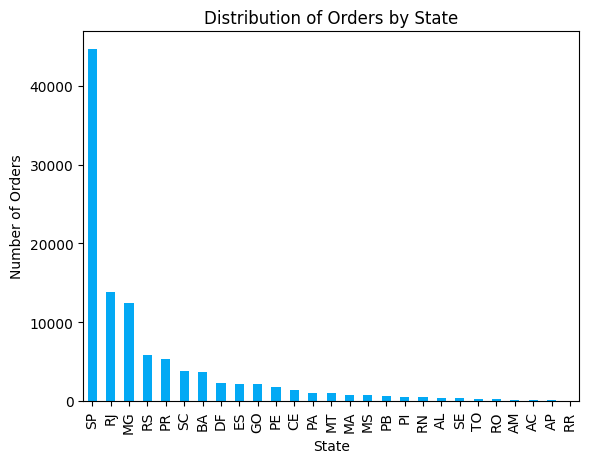

In [48]:
target_sales['customer_state'].value_counts().plot(kind='bar', color='#03A9F4')
plt.title('Distribution of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.show()

The 'customer_state' column is heavily skewed to the right. Most orders came from the state 'SP'.

### Analyzing Distributions: order_purchase_timestamp

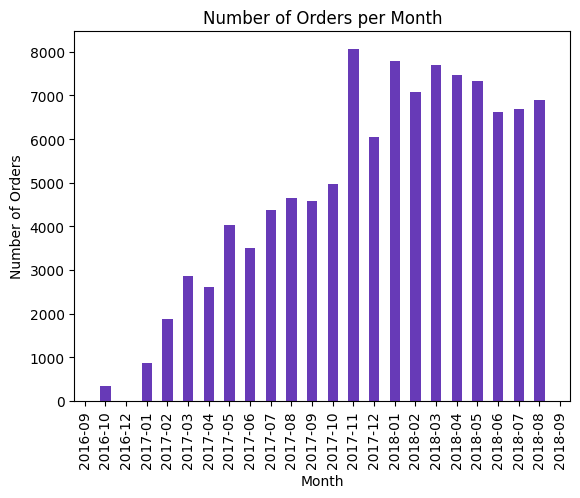

In [49]:
target_sales['order_month'] = target_sales['order_purchase_timestamp'].dt.to_period('M')

target_sales['order_month'].value_counts().sort_index().plot(kind='bar', color='#673AB7')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

The 'order_purchase_timestamp' column is heavily skewed to the left. Most orders came from the timeperiod of 2017-11 to 2018-09.

### Analyzing Distributions: payment_type

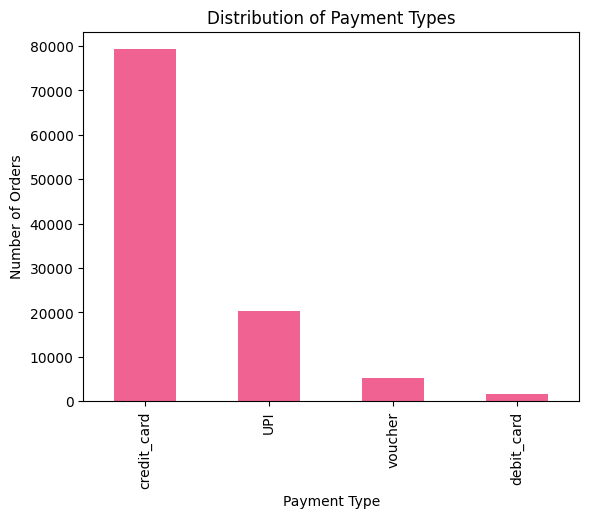

In [50]:
target_sales['payment_type'].value_counts().plot(kind='bar', color='#F06292')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.show()

Most customers used credit cards and UPI to pay for their purchases.

### Analyzing Distributions: payment_installments

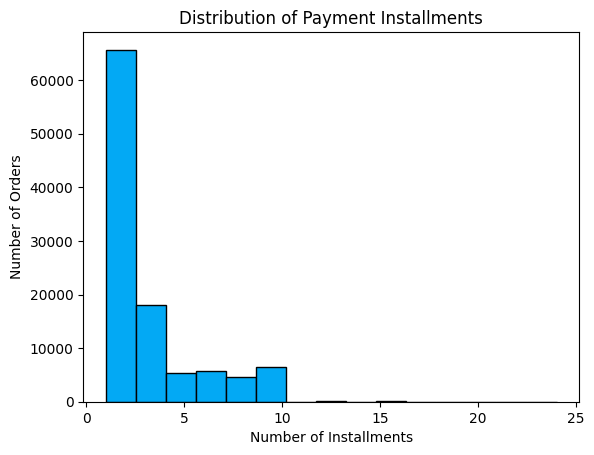

In [53]:
target_sales['payment_installments'].plot(kind='hist', bins=15, color='#03A9F4', edgecolor='black')
plt.title('Distribution of Payment Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Number of Orders')
plt.show()

Most customers paid for their orders with less than 5 installments.

### Analyzing Distributions: payment_value

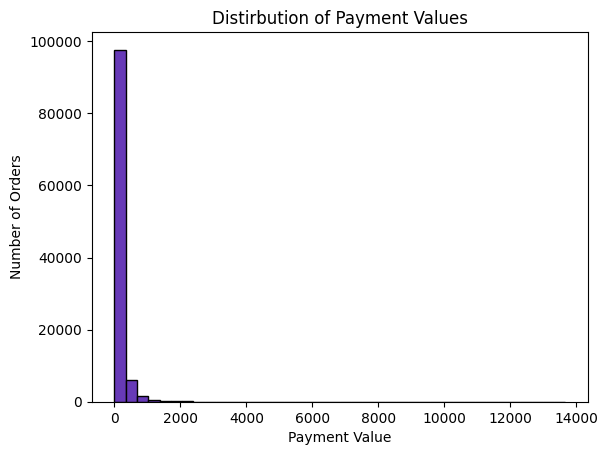

In [57]:
target_sales['payment_value'].plot(kind='hist', bins=15, color='#673AB7', edgecolor='black')
plt.title('Distirbution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Number of Orders')
plt.show()

The 'payment_value' column is heavily skewed to the right. Most orders have a payment value of less than 1,000. There are a few extremely high payment values.

### Analyzing Distributions: product_category_name

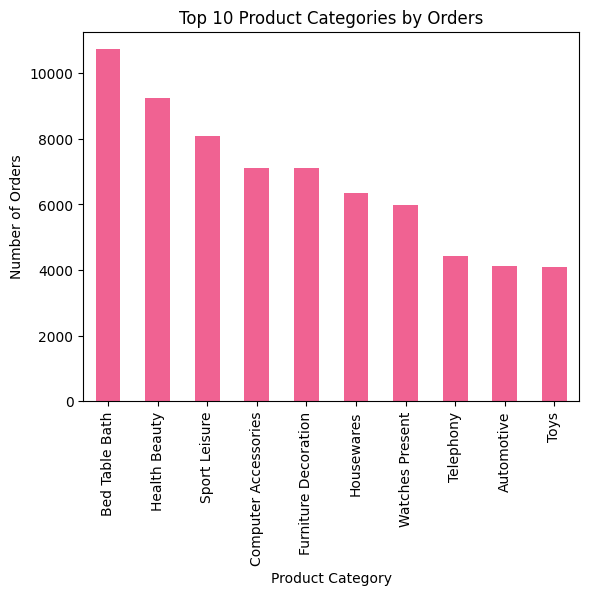

In [58]:
target_sales['product category'].value_counts().head(10).plot(kind='bar', color='#F06292')
plt.title('Top 10 Product Categories by Orders')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.show()

The barplot created shows the top 10 product categories based on number of orders. The top product category is 'Bed Table Bath'.

### Analyzing Distributions: price

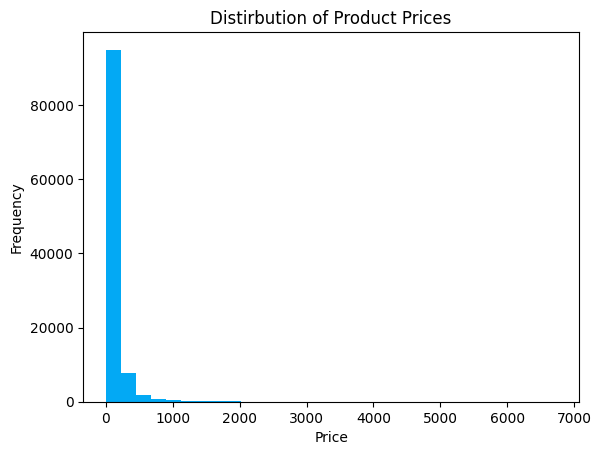

In [59]:
target_sales['price'].plot(kind='hist', bins=30, color='#03A9F4')
plt.title('Distirbution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The distribution of the 'price' column is skewed heavily to the right. Most products are priced under 1000. A few products have a very high price.

### Exporting the Cleaned Dataset

In [60]:
target_sales.to_csv("target_sales_full_cleaned.csv", index=False)

## SQL Queries

In this section, SQL queries will be used to help answer our main question.

Main Question: What are the top 3 states with the most orders, and what was their purchasing behavior?

### SQL Queries: What are the top 3 states with the most orders?

In [63]:
query = """
SELECT customer_state, COUNT(order_id) AS total_orders
FROM orders_customers_payments_order_items_products_join
GROUP BY customer_state
ORDER BY total_orders DESC
LIMIT 3
"""

cursor.execute(query)
results = cursor.fetchall()
print(results)

[('SP', 49566), ('RJ', 15327), ('MG', 13638)]


The top 3 states with the most orders is 'SP', 'RJ', and 'MG'.

### SQL Queries: order_purchase_timestamp

This query is to find the orders per year for the top three states of 'SP', 'RJ', and 'MG'.

In [69]:
query = """
SELECT STRFTIME('%Y', order_purchase_timestamp) AS year, customer_state, COUNT(order_id) AS total_orders
FROM orders_customers_payments_order_items_products_join
WHERE customer_state IN ('SP', 'RJ', 'MG')
GROUP BY year, customer_state
ORDER BY year, customer_state
"""
cursor.execute(query)
results = cursor.fetchall()
print(results)

[('2016', 'MG', 49), ('2016', 'RJ', 64), ('2016', 'SP', 127), ('2017', 'MG', 6409), ('2017', 'RJ', 7410), ('2017', 'SP', 21239), ('2018', 'MG', 7180), ('2018', 'RJ', 7853), ('2018', 'SP', 28200)]


In [70]:
results_df = pd.DataFrame(results, columns=['Year', 'State', 'Total Orders'])
results_df

,Year,State,Total Orders
0,2016,MG,49
1,2016,RJ,64
2,2016,SP,127
3,2017,MG,6409
4,2017,RJ,7410
5,2017,SP,21239
6,2018,MG,7180
7,2018,RJ,7853
8,2018,SP,28200


This query is to find the total number of orders in the states 'SP', 'RJ', and 'MG' based on the day of the week.

In [71]:
query = """
SELECT STRFTIME('%w', order_purchase_timestamp) AS day_of_week, customer_state, COUNT(order_id) AS total_orders
FROM orders_customers_payments_order_items_products_join
WHERE customer_state IN ('SP', 'RJ', 'MG')
GROUP BY day_of_week, customer_state
ORDER BY day_of_week, customer_state
"""

cursor.execute(query)
results = cursor.fetchall()
print(results)

[('0', 'MG', 1577), ('0', 'RJ', 1830), ('0', 'SP', 5974), ('1', 'MG', 2156), ('1', 'RJ', 2418), ('1', 'SP', 8188), ('2', 'MG', 2237), ('2', 'RJ', 2494), ('2', 'SP', 8196), ('3', 'MG', 2121), ('3', 'RJ', 2392), ('3', 'SP', 7705), ('4', 'MG', 2103), ('4', 'RJ', 2208), ('4', 'SP', 7436), ('5', 'MG', 2000), ('5', 'RJ', 2222), ('5', 'SP', 6882), ('6', 'MG', 1444), ('6', 'RJ', 1763), ('6', 'SP', 5185)]


In [72]:
results_df = pd.DataFrame(results, columns=['Day of Week', 'State', 'Total Orders'])
results_df

,Day of Week,State,Total Orders
0,0,MG,1577
1,0,RJ,1830
2,0,SP,5974
3,1,MG,2156
4,1,RJ,2418
5,1,SP,8188
6,2,MG,2237
7,2,RJ,2494
8,2,SP,8196
9,3,MG,2121


### SQL Queries: payment_type

This query calculates the total number of orders for each payment method used in the top three states.

In [73]:
query = """
SELECT payment_type, customer_state, COUNT(order_id) AS total_orders
FROM orders_customers_payments_order_items_products_join
WHERE customer_state IN ('SP', 'RJ', 'MG')
GROUP BY payment_type, customer_state
ORDER BY payment_type, customer_state
"""

cursor.execute(query)
results = cursor.fetchall()
print(results)

[('UPI', 'MG', 2689), ('UPI', 'RJ', 2516), ('UPI', 'SP', 9496), ('credit_card', 'MG', 10170), ('credit_card', 'RJ', 11638), ('credit_card', 'SP', 36475), ('debit_card', 'MG', 151), ('debit_card', 'RJ', 209), ('debit_card', 'SP', 862), ('voucher', 'MG', 628), ('voucher', 'RJ', 964), ('voucher', 'SP', 2733)]


In [74]:
results_df = pd.DataFrame(results, columns=['Payment Type', 'State', 'Total Orders'])
results_df

,Payment Type,State,Total Orders
0,UPI,MG,2689
1,UPI,RJ,2516
2,UPI,SP,9496
3,credit_card,MG,10170
4,credit_card,RJ,11638
5,credit_card,SP,36475
6,debit_card,MG,151
7,debit_card,RJ,209
8,debit_card,SP,862
9,voucher,MG,628


### SQL Queries: payment_installments

This query shows the total number of orders that were paid in full versus paid in installments for the top 3 states.

In [76]:
query = """
SELECT payment_installments, customer_state, COUNT(order_id) AS total_orders
FROM orders_customers_payments_order_items_products_join
WHERE customer_state IN ('SP', 'RJ', 'MG')
GROUP BY payment_installments, customer_state
ORDER BY payment_installments, customer_state
"""

cursor.execute(query)
results = cursor.fetchall()
print(results)

[(0, 'SP', 1), (1, 'MG', 6446), (1, 'RJ', 7267), (1, 'SP', 26444), (2, 'MG', 1560), (2, 'RJ', 1876), (2, 'SP', 6059), (3, 'MG', 1472), (3, 'RJ', 1618), (3, 'SP', 4767), (4, 'MG', 976), (4, 'RJ', 1075), (4, 'SP', 3018), (5, 'MG', 755), (5, 'RJ', 803), (5, 'SP', 2342), (6, 'MG', 563), (6, 'RJ', 613), (6, 'SP', 1654), (7, 'MG', 239), (7, 'RJ', 278), (7, 'SP', 639), (8, 'MG', 632), (8, 'RJ', 711), (8, 'SP', 1901), (9, 'MG', 82), (9, 'RJ', 91), (9, 'SP', 280), (10, 'MG', 870), (10, 'RJ', 934), (10, 'SP', 2310), (11, 'MG', 4), (11, 'RJ', 4), (11, 'SP', 9), (12, 'MG', 15), (12, 'RJ', 27), (12, 'SP', 51), (13, 'MG', 3), (13, 'RJ', 2), (13, 'SP', 6), (14, 'MG', 3), (14, 'RJ', 1), (14, 'SP', 7), (15, 'MG', 7), (15, 'RJ', 11), (15, 'SP', 31), (16, 'SP', 4), (17, 'MG', 1), (17, 'RJ', 1), (17, 'SP', 2), (18, 'MG', 6), (18, 'RJ', 4), (18, 'SP', 18), (20, 'RJ', 7), (20, 'SP', 6), (21, 'SP', 2), (22, 'RJ', 1), (23, 'SP', 1), (24, 'MG', 4), (24, 'RJ', 3), (24, 'SP', 14)]


In [77]:
results_df = pd.DataFrame(results, columns=['Payment Installments', 'State', 'Total Orders'])
results_df

,Payment Installments,State,Total Orders
0,0,SP,1
1,1,MG,6446
2,1,RJ,7267
3,1,SP,26444
4,2,MG,1560
...,...,...,...
56,22,RJ,1
57,23,SP,1
58,24,MG,4
59,24,RJ,3


### SQL Queries: payment_value

This query will find the total value of all orders for each of the top 3 states.

In [78]:
query = """
SELECT customer_state, SUM(payment_value) AS total_payment_value
FROM orders_customers_payments_order_items_products_join
WHERE customer_state IN ('SP', 'RJ', 'MG')
GROUP BY customer_state
ORDER BY total_payment_value DESC
"""

cursor.execute(query)
results = cursor.fetchall()
print(results)

[('SP', 7597209.66), ('RJ', 2769347.44), ('MG', 2326151.64)]


In [80]:
results_df = pd.DataFrame(results, columns=['State', 'Total Payment Value'])
results_df

,State,Total Payment Value
0,SP,7597209.66
1,RJ,2769347.44
2,MG,2326151.64


This query will find the average order value for each state.

In [82]:
query = """
SELECT customer_state, AVG(payment_value) AS avg_payment_value
FROM orders_customers_payments_order_items_products_join
WHERE customer_state IN ('SP', 'RJ', 'MG')
GROUP BY customer_state
ORDER BY avg_payment_value DESC
"""

cursor.execute(query)
results = cursor.fetchall()
print(results)

[('RJ', 180.68424610165067), ('MG', 170.5639859216894), ('SP', 153.2746168744704)]


In [83]:
results_df = pd.DataFrame(results, columns=['State', 'Average Payment Value'])
results_df

,State,Average Payment Value
0,RJ,180.684246
1,MG,170.563986
2,SP,153.274617


### SQL Queries: product_category_name

This query will give the the total payment value for each product category for the top 3 states.

In [90]:
query = """
SELECT "product category", customer_state, SUM(payment_value) AS total_payment_value
FROM orders_customers_payments_order_items_products_join
WHERE customer_state IN ('SP', 'RJ', 'MG')
GROUP BY "product category", customer_state
ORDER BY total_payment_value DESC
"""

cursor.execute(query)
results = cursor.fetchall()

results_df = pd.DataFrame(results, columns=['Product Category', 'State', 'Total Payment Value'])
results_df

,Product Category,State,Total Payment Value
0,bed table bath,SP,765517.23
1,computer accessories,SP,634556.96
2,HEALTH BEAUTY,SP,616107.20
3,Furniture Decoration,SP,553653.25
4,sport leisure,SP,523755.73
...,...,...,...
210,House Comfort 2,MG,134.06
211,Fashion Children's Clothing,RJ,124.52
212,cds music dvds,RJ,122.22
213,Kitchen portable and food coach,RJ,103.68


### SQL Queries: price

This query will provide the average price of products in each of the top 3 states.

In [91]:
query = """
SELECT customer_state, AVG(price) AS avg_price
FROM orders_customers_payments_order_items_products_join
WHERE customer_state IN ('SP', 'RJ', 'MG')
GROUP BY customer_state
ORDER BY avg_price DESC
"""

cursor.execute(query)
results = cursor.fetchall()
print(results)

[('RJ', 124.84923076923076), ('MG', 120.22560712714474), ('SP', 109.91741818988822)]


In [93]:
results_df = pd.DataFrame(results, columns=['State', 'Average Price of Products'])
results_df

,State,Average Price of Products
0,RJ,124.849231
1,MG,120.225607
2,SP,109.917418


Closing the connection.

In [94]:
conn.close()

## Conclusion and Next Steps
In this notebook I have done the following:
- Cleaned Data
- Examined Distributions
- Used SQL queries to explore the data and help answer the main question.

Insights
- There were many duplicate rows that were removed (11,213).

- The top 3 states with the most orders were 'SP', 'RJ', and 'MG'.

Next steps
- I will used the cleaned dataset in Tableau to create visualizations.